In [1]:
import rasterio.mask
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
europe_shape = gpd.read_file('/cluster/work/cpesm/trtim/possibility-for-electricity-autarky/build/national/units.geojson')

img_old = {}
img_new = {}
with rasterio.open(
    '/cluster/work/cpesm/brynmorp/euro-spores/land-eligibility/build/elevation-europe.tif'
) as src:
    clc = src.read(1)
    crs = src.crs
    europe_reshaped = europe_shape.to_crs(crs)
    
    for country in europe_shape.country_code.unique():
        img_old[country], transform_nor_old = rasterio.mask.mask(
            src, europe_reshaped[europe_reshaped.country_code == country].geometry.values, 
            crop=True
        )
    
with rasterio.open(
    '/cluster/work/cpesm/brynmorp/possibility-for-electricity-autarky/build/elevation-europe.tif'
) as src:
    clc = src.read(1)
    crs = src.crs
    europe_reshaped = europe_shape.to_crs(crs)
    
    for country in europe_shape.country_code.unique():
        img_new[country], transform_nor_old = rasterio.mask.mask(
            src, europe_reshaped[europe_reshaped.country_code == country].geometry.values, 
            crop=True
        )

In [3]:
for i in [img_old, img_new]:
    for k, v in i.items():
        _data = v[0].astype(float)
        _data[_data < 0] = np.nan
        i[k] = _data

In [23]:
pd.MultiIndex.from_tuples((('mean', 'old'), ('mean', 'new'), ('std', 'old'), ('std', 'new')))

MultiIndex(levels=[['mean', 'std'], ['new', 'old']],
           labels=[[0, 0, 1, 1], [1, 0, 1, 0]])

In [24]:
countries = [i for i in img_new.keys()]
foo = pd.DataFrame(
    data=[
        [img_old[i][~np.isnan(img_old[i])].mean(), img_new[i][~np.isnan(img_new[i])].mean(), img_old[i][~np.isnan(img_old[i])].std(), img_new[i][~np.isnan(img_new[i])].std()] 
        for i in countries
    ], 
    index=countries, 
    columns=pd.MultiIndex.from_tuples([('mean', 'old'), ('mean', 'new'), ('std', 'old'), ('std', 'new')])
)

In [11]:
slope_direct_clean

,0,1,2,3,4,5,6,7,8,9,...,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
slope_direct = pd.read_csv('../data/array_slope_direct_2.csv', index_col=0, header=0)
slope_indirect = pd.read_csv('../data/array_slope_indirect.csv', index_col=0, header=0)
slope_indirect_old = pd.read_csv('../data/array_slope_indirect_old.csv', index_col=0, header=0)

In [13]:
slope_direct_clean = slope_direct.where((slope_direct < 90) & (slope_direct >= 0))
slope_indirect_clean = slope_indirect.mul(1e5).where((slope_indirect < 90e-5) & (slope_indirect >= 0))
slope_indirect_old_clean = slope_indirect_old.where((slope_indirect_old < 90) & (slope_indirect_old >= 0))

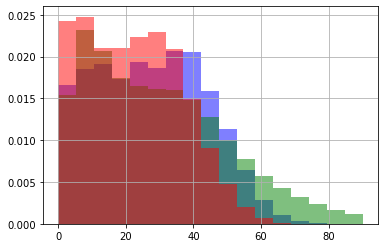

In [16]:
ax = slope_direct_clean.stack().hist(fc='blue', alpha=0.5, bins=np.linspace(0, 90, 18), density=True)
slope_indirect_clean.stack().hist(fc='green', alpha=0.5, ax=ax, bins=np.linspace(0, 90, 18), density=True)
slope_indirect_old_clean.stack().hist(fc='red', alpha=0.5, ax=ax, bins=np.linspace(0, 90, 18), density=True)

In [ ]:
slope_direct_clean.stack().hist(bins=np.linspace(0, 90, 18), density=True)
slope_indirect_clean.stack().hist(fc='green', alpha=0.5, ax=ax, bins=np.linspace(0, 90, 18), density=True)
slope_indirect_old_clean.stack().hist(fc='red', alpha=0.5, ax=ax, bins=np.linspace(0, 90, 18), density=True)

In [50]:
foo = (slope_direct_clean - slope_indirect_clean).div(slope_indirect_clean)

In [58]:
slope_direct_clean.stack().reindex(slope_indirect_clean.stack().index)

1     8216     7.252247
2     8215     8.885124
      8216     8.885124
      8217     8.885124
3     8214    10.263096
                ...    
8862  9448    14.533747
      9449    13.590494
      9450    12.578119
      9451    10.263096
      9452     7.252247
Length: 64038521, dtype: float64

In [59]:
slope_indirect_clean.stack()

1     8216     7.289610
2     8215     8.461931
      8216     7.890909
      8217     8.648894
3     8214     9.550283
                ...    
8862  9448    13.081743
      9449    12.076674
      9450    11.014603
      9451     8.907615
      9452     7.181395
Length: 63944499, dtype: float64

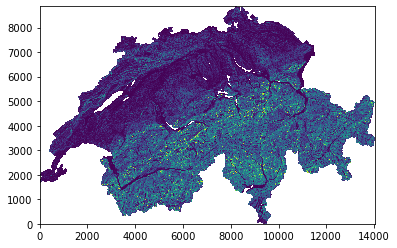

In [64]:
plt.pcolormesh(slope_indirect_clean[::-1], vmin=0, vmax=90)

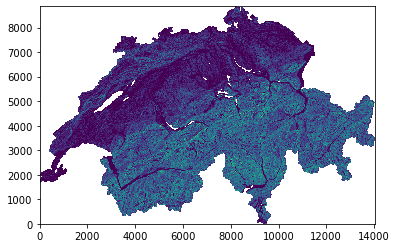

In [65]:
plt.pcolormesh(slope_direct_clean[::-1], vmin=0, vmax=90)

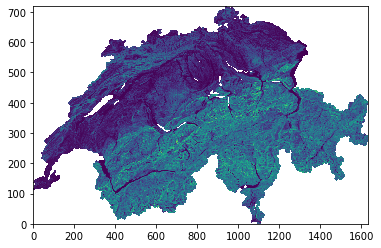

In [66]:
plt.pcolormesh(slope_indirect_old_clean[::-1], vmin=0, vmax=90)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 15))
ax[0].pcolormesh(slope_direct_clean[::-1], vmin=0, vmax=90)
ax[0].set_title('EU-DEM v1.0 slope')

ax[1].pcolormesh(slope_indirect_clean[::-1], vmin=0, vmax=90)
ax[1].set_title('EU-DEM v1.1 derived slope')

ax[2].pcolormesh(slope_indirect_clean[::-1], vmin=0, vmax=90)
ax[2].set_title('SRTM derived slope')


In [ ]:
plt.imshow(foo, origin='upper')